# Aufgabe 20 k-NN Klassifikation

## a) Worauf müssen Sie bei einem k-NN-Algorithmus achten, wenn die Attribute sich stark in ihren Größenordnungen unterscheiden?

Wichtig ist der Abstand zu den k nächsten Nachbarn des Trainings Datensatzes.  
Dafür kann ein beliebiges Abstandsmaß gewählt werden.  
Allerdings sind so gut wie alle Abstandsmaße nicht für den Fall optimiert, dass die Dimensionen auf verschiedenen Größenordnungen liegen.  
Also kann ein Attribut mit viel größeren Werten als die anderen, diese stark überwiegen und so wird quasi nur dieses Attribut zur Klassifizierung verwendet.  

Um dieses Problem zu lösen sollte man die Daten skalieren. Z.B. auf standard-normal verteilte Werte.

## b)

### Warum bezeichnet man den k-NN als sogenannten "lazy learner"?

Es findet nicht wirklich ein Training statt.
Beim Training wird nur der Trainings Datensatz abgespeichert.  
Als "lazy learner" wird ein Maschineller Lerner bezeichnet, dessen Modellbildung nicht während dem Training sondern während der Anwendung geschieht.

### Wie sind die Laufzeiten für Lern- und Anwendungs-Phase?

https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5 

Varibalen:
- $n$ : Anzahl der Samples im Trainings-Datensatz
- $d$ : Anzahl der Dimensionen/Attributen
- $k$ : Anzahl der betrachteten Nachbarn

Komplexität:  

| Methode | Training Laufzeit | Anwendung Laufzeit | Training Speicher | Anwendung Speicher |
|:------- |:----------------- |:------------------ |:----------------- |:------------------ |
| Bruteforce Methode | $O(1)$ | $O(knd)$ | $O(1)$ | $O(1)$ |
| $k-d$-Baum Methode | $O(dn\log(n))$ | $O(k\log(n))$ | $O(dn)$ | $O(1)$ |
| Ball-Baum Methode | $O(dn\log(n))$ | $O(k\log(n))$ | $O(dn)$ | $O(1)$ |

Also ist in der Bruteforce Methode quasi keine Laufzeit beim Training vorhanden, dafür aber ziemlich viel Laufzeit während der Anwendung.
Bei den Baum Methoden ist die Laufzeit des Trainings höher als die der Anwendung, da normalerweise $d\cdot n > k$

### Wie sind sie im Vergleich zu anderen Algorithmen, wie bspw. einem Random Forest?

https://www.thekerneltrip.com/machine/learning/computational-complexity-learning-algorithms/ 

$t=$ Anzahl der Bäume

Komplexität des Random Forests:

- Training: $O(n^2dt)$
- Anwendung: $O(dt)$

Also dauert im normalfall das Training eines Random Forests deutlich länger als eines k-NN.  
Aber die Anwendung dauert beim k-NN deutlich länger als beim Random Forest.

## c) Implementieren Sie einen k-NN zur Klassifikation mit einer Struktur wie in `class_structure.py`

Implementiert in `knn.py` und weiter unten im PDF angehangen. (Bruteforce Methode)

### Test mit `sklearn.datasets.make_blobs`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_blobs(n_samples=1000,centers=10,n_features=5,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [3]:
from knn import KNN
knn = KNN(k=10)
knn.fit(X_train,y_train)

In [4]:
y_pred = knn.predict(X_test)

  0%|          | 0/330 [00:00<?, ?it/s]

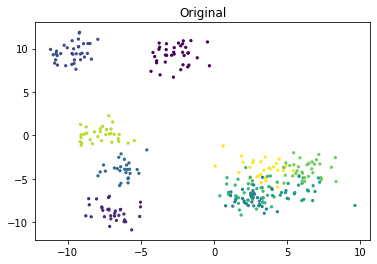

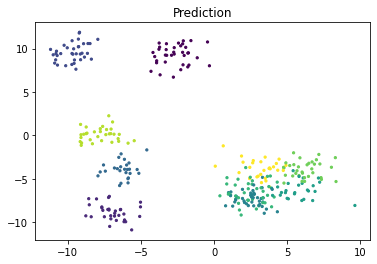

In [5]:
plt.scatter(X_test[:,0],X_test[:,1],s=5,c=y_test)
plt.title('Original')
plt.show()
plt.scatter(X_test[:,0],X_test[:,1],s=5,c=y_pred)
plt.title('Prediction')
plt.show()

## d) Wenden Sie ihren Algorithmus auf das Neutrino Monte-Carlo von Blatt 5 an.

In [6]:
import numpy as np
import pandas as pd

### Daten preparieren

In [7]:
hdf_store = pd.HDFStore('NeutrinoMC.hdf5')
hdf_store.keys()

['/Background', '/Signal']

Definitionen: 

| Klasse | Label | Abkürzung |
|:------ |:-----:|:---------:|
| Background | 0 | bg |
| Signal | 1 | sg |

In [8]:
df_bg = pd.read_hdf(hdf_store,key='Background')
df_bg

,NumberOfHits,x,y
0,34.0,5.954540,4.150890
1,60.0,5.301269,4.981201
2,66.0,7.959579,2.582597
3,190.0,5.945263,9.461087
4,27.0,3.287903,5.043371
...,...,...,...
9999995,8.0,7.669263,3.490592
9999996,1068.0,0.726955,4.363312
9999997,7776.0,0.304958,0.646405
9999998,40.0,9.099021,5.217930


In [9]:
df_sg = pd.read_hdf(hdf_store,key='Signal')
df_sg

,Energy,AcceptanceMask,NumberOfHits,x,y
0,1.564945,False,NaN,NaN,NaN
1,3.704830,False,NaN,NaN,NaN
2,1.794735,False,NaN,NaN,NaN
3,1.470759,False,NaN,NaN,NaN
4,3.930271,False,NaN,NaN,NaN
...,...,...,...,...,...
99995,1.080202,False,NaN,NaN,NaN
99996,1.250218,False,NaN,NaN,NaN
99997,5.154960,True,47.0,6.829988,2.523224
99998,1.012822,False,NaN,NaN,NaN


In [10]:
hdf_store.close()

In [11]:
feature_names = ['NumberOfHits','x','y']

In [12]:
X_bg = df_bg[feature_names].to_numpy()
y_bg = np.zeros(shape=X_bg.shape[0])
X_bg.shape, y_bg.shape

((10000000, 3), (10000000,))

In [13]:
X_sg = df_sg.loc[df_sg['AcceptanceMask'],feature_names].to_numpy()
y_sg = np.ones(shape=X_sg.shape[0])
X_sg.shape, y_sg.shape

((25007, 3), (25007,))

In [14]:
n_train_bg = 5000
n_train_sg = 5000
n_test_bg = 20000
n_test_sg = 10000
n_bg = n_train_bg + n_test_bg
n_sg = n_train_sg + n_test_sg

In [15]:
# nimm die ersten Einträge als Trainings Datensatz
X_train = np.concatenate((X_bg[:n_train_bg],X_sg[:n_train_sg]))
y_train = np.concatenate((y_bg[:n_train_bg],y_sg[:n_train_sg]))
X_train.shape, y_train.shape

((10000, 3), (10000,))

In [28]:
# nimm die Einträge danach als Test Datensatz
X_test = np.concatenate((X_bg[n_train_bg:n_bg],X_sg[n_train_sg:n_sg]))
y_test = np.concatenate((y_bg[n_train_bg:n_bg],y_sg[n_train_sg:n_sg]))
X_test.shape, y_test.shape

((30000, 3), (30000,))

### k-NN trainieren und testen

In [17]:
from knn import KNN
knn = KNN(k=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

  0%|          | 0/30000 [00:00<?, ?it/s]

### Reinheit, Effizienz und Signifikanz auf dem Test Datensatz

In [18]:
def true_false_positiv_negative(y_true,y_pred):
    # positiv = Signal = 1
    # negativ = Background = 0
    tp = ((y_true==1) & (y_pred==1)).sum()
    fp = ((y_true==0) & (y_pred==1)).sum()
    tn = ((y_true==0) & (y_pred==0)).sum()
    fn = ((y_true==1) & (y_pred==0)).sum()
    return tp,fp,tn,fn

In [19]:
def precision(tp,fp,tn,fn):
    'Reinheit'
    return tp/(tp+fp)

def recall(tp,fp,tn,fn):
    'Effizienz'
    return tp/(tp+fn)

# ?????????
def significance(tp,fp,tn,fn):
    'Signifikanz'
    return tp/(tp+fn)

In [20]:
tp,fp,tn,fn = true_false_positiv_negative(y_test,y_pred)
print(f'Reinheit: \t {precision(tp,fp,tn,fn)}')
print(f'Effizienz: \t {recall(tp,fp,tn,fn)}')
print(f'Signifikanz: \t {significance(tp,fp,tn,fn)}')

Reinheit: 	 0.8473721465227393
Effizienz: 	 0.9577
Signifikanz: 	 0.9577


## e) Was ändert sich wenn Sie `log10(AnzahlHits)` statt `AnzahlHits` 

In [21]:
X_train_log = X_train.copy()
X_train_log[:,0] = np.log10(X_train_log[:,0])

X_test_log = X_test.copy()
X_test_log[:,0] = np.log10(X_test_log[:,0])

In [22]:
knn_log = KNN(k=10)
knn_log.fit(X_train_log,y_train)
y_pred_log = knn_log.predict(X_test_log)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [23]:
tp,fp,tn,fn = true_false_positiv_negative(y_test,y_pred_log)
print(f'Reinheit: \t {precision(tp,fp,tn,fn)}')
print(f'Effizienz: \t {recall(tp,fp,tn,fn)}')
print(f'Signifikanz: \t {significance(tp,fp,tn,fn)}')

Reinheit: 	 0.8752237737200144
Effizienz: 	 0.9778
Signifikanz: 	 0.9778


Reinheit, Effizienz und Signifikanz sind deutlich höher wenn man `log10(AnzahlHits)` statt `AnzahlHits` verwendet.

### Was ändert sich, wenn Sie $k=20$ statt $k=10$ verwenden?

In [24]:
knn_20 = KNN(k=20)
knn_20.fit(X_train,y_train)
y_pred_20 = knn_20.predict(X_test)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [25]:
tp,fp,tn,fn = true_false_positiv_negative(y_test,y_pred_20)
print(f'Reinheit: \t {precision(tp,fp,tn,fn)}')
print(f'Effizienz: \t {recall(tp,fp,tn,fn)}')
print(f'Signifikanz: \t {significance(tp,fp,tn,fn)}')

Reinheit: 	 0.8235597592433362
Effizienz: 	 0.9578
Signifikanz: 	 0.9578


Reinheit, Effizienz und Signifikanz ändern sich nur sehr wenig wenn man $k=20$ statt $k=10$ verwendet.

### $k=20$ und `log10(AnzahlHits)`

In [26]:
knn_20 = KNN(k=20)
knn_20.fit(X_train_log,y_train)
y_pred_20_log = knn_20.predict(X_test_log)

  0%|          | 0/30000 [00:00<?, ?it/s]

In [27]:
tp,fp,tn,fn = true_false_positiv_negative(y_test,y_pred_20_log)
print(f'Reinheit: \t {precision(tp,fp,tn,fn)}')
print(f'Effizienz: \t {recall(tp,fp,tn,fn)}')
print(f'Signifikanz: \t {significance(tp,fp,tn,fn)}')

Reinheit: 	 0.8629704360031581
Effizienz: 	 0.9837
Signifikanz: 	 0.9837


Bei $k=20$ und `log10(AnzahlHits)` wird das insgesamt beste Ergebniss erzielt